In [5]:
# ------------------------------------------------------------
# ---------------- Data Manipulation -------------------------
# ------------------------------------------------------------
import pandas as pd

# ------------------------------------------------------------
# ---------------- Data Visualization ------------------------
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#df = pd.read_csv('../scripts/simulations.csv')
#df = df.drop('Unnamed: 0', axis=1)
df = pd.read_csv('../scripts/simulations_new.csv')
df = df.drop('Unnamed: 0', axis=1)

- TL: Traffic Lights prioritize ambulance's path
- GL: Normal vehicles give lane to the ambulance
- NH: ERU selects nearest hospital to send ambulance
- FR: Full Responsive - Uses all of the strategies above
- NA: None of the above

In [7]:
df.describe()

,number_of_vehicles,ambulance_arrival_time
count,451.000000,451.000000
mean,450.000000,170.973392
std,183.711731,99.048941
min,225.000000,-1.000000
25%,225.000000,99.500000
50%,450.000000,137.000000
75%,675.000000,260.000000
max,675.000000,537.000000


In [8]:
def give_simulation_name(df):
    if df.can_change_lane and df.can_open_traffic and df.can_find_nearest_hospital:
        df['name'] = 'FR'
    if df.can_change_lane and not df.can_open_traffic and not df.can_find_nearest_hospital:
        df['name'] = 'GL'
    if not df.can_change_lane and df.can_open_traffic and not df.can_find_nearest_hospital:
        df['name'] = 'TL'
    if not df.can_change_lane and not df.can_open_traffic and df.can_find_nearest_hospital:
        df['name'] = 'NH'
    if not df.can_change_lane and not df.can_open_traffic and not df.can_find_nearest_hospital:
        df['name'] = 'NA'
    return df
    
#df = df.apply(give_simulation_name, axis=1)
#df.head()



df.head()

,name,number_of_vehicles,ambulance_arrival_time
0,RC,225,62
1,SR,450,134
2,RC,225,65
3,RC,675,106
4,AP,225,143


## Calculate average arrival time by simulation type

In [9]:
#df.groupby(['name', 'number_of_vehicles']).mean().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital'], axis = 1)
grouped_df = df.groupby(['name', 'number_of_vehicles'])['ambulance_arrival_time']
print(grouped_df.mean())
#df.groupby(['name', 'number_of_vehicles'])[]



name  number_of_vehicles
AP    225                   144.833333
      450                   245.870968
      675                   179.666667
AS    225                    92.066667
      450                   153.800000
      675                   136.300000
EH    225                   133.666667
      450                   239.733333
      675                   176.166667
RC    225                    79.233333
      450                   234.566667
      675                   167.533333
SR    225                   128.766667
      450                   235.366667
      675                   214.533333
Name: ambulance_arrival_time, dtype: float64


In [10]:
#df.groupby(['name', 'number_of_vehicles']).std().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital'], axis = 1)
print(grouped_df.std())

name  number_of_vehicles
AP    225                    58.193544
      450                   141.625737
      675                   101.973064
AS    225                    54.819411
      450                    89.977928
      675                    76.285828
EH    225                     2.309401
      450                    92.450894
      675                    73.326894
RC    225                    67.480103
      450                   120.852912
      675                    83.001759
SR    225                    41.036303
      450                    87.521616
      675                    96.595043
Name: ambulance_arrival_time, dtype: float64


## Calculate average arrival time by number of vehicles

In [11]:
df.groupby(['number_of_vehicles']).mean().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital'], axis = 1)

KeyError: "['can_change_lane' 'can_open_traffic' 'can_find_nearest_hospital'] not found in axis"

In [12]:
df.groupby(['name']).std().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital', 'number_of_vehicles'], axis = 1)

KeyError: "['can_change_lane' 'can_open_traffic' 'can_find_nearest_hospital'] not found in axis"

In [13]:
df.describe()

,number_of_vehicles,ambulance_arrival_time
count,451.000000,451.000000
mean,450.000000,170.973392
std,183.711731,99.048941
min,225.000000,-1.000000
25%,225.000000,99.500000
50%,450.000000,137.000000
75%,675.000000,260.000000
max,675.000000,537.000000


In [14]:
colors = sns.color_palette("bright", 5)


In [15]:
#Analyzing the travel times for each vehicle density

colors = sns.color_palette("bright", 5)

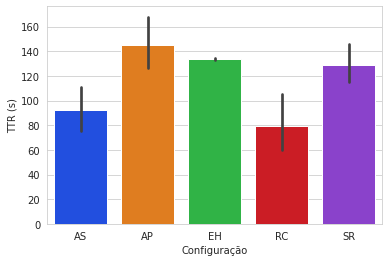

In [16]:
df_100 = df.drop(df[df.number_of_vehicles != 225].index)

# Create the bar graph using seaborn
sns.set_style('whitegrid')
sns.barplot(x='name', y='ambulance_arrival_time',
            order=['AS', 'AP', 'EH', 'RC', 'SR'], palette=colors, data=df_100)

# Add title and axis labels
plt.xlabel('Configuração')
plt.ylabel('TTR (s)')

# Display the graph
plt.show()

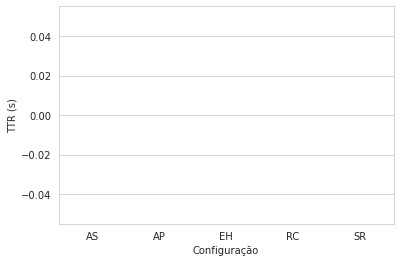

In [17]:
df_225 = df.drop(df[df.number_of_vehicles != 506].index)

# Create the bar graph using seaborn
sns.set_style('whitegrid')
sns.barplot(x='name', y='ambulance_arrival_time', 
            order=['AS', 'AP', 'EH', 'RC', 'SR'], palette=colors, data=df_225)

# Add title and axis labels
plt.xlabel('Configuração')
plt.ylabel('TTR (s)')

# Display the graph
plt.show()

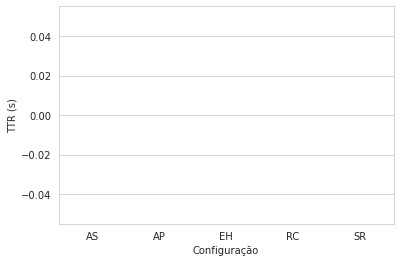

In [18]:
df_350 = df.drop(df[df.number_of_vehicles != 787].index)

# Create the bar graph using seaborn
sns.set_style('whitegrid')
sns.barplot(x='name', y='ambulance_arrival_time',
            order=['AS', 'AP', 'EH', 'RC', 'SR'], palette=colors, data=df_350)

# Add title and axis labels
plt.xlabel('Configuração')
plt.ylabel('TTR (s)')

# Display the graph
plt.show()

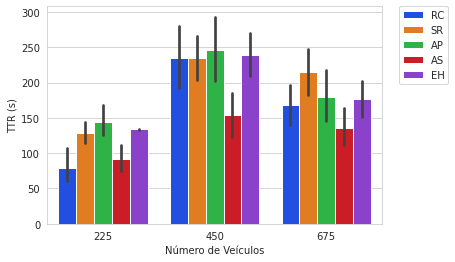

In [19]:
# Create the bar graph using seaborn
sns.barplot(x='number_of_vehicles', y='ambulance_arrival_time', hue='name', palette=colors, data=df)

# Add title and axis labels
plt.xlabel('Número de Veículos')
plt.ylabel('TTR (s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the graph
plt.show()